**Unzip the file**

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/fer2013.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


**Import the Libraries**

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Initializing Training And Test Generators:**

In [ ]:
TRAIN_DIR = 'train'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    target_size=(48,48),
    subset='training',
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(48,48),
    subset='validation',
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
test_data = 'test'

**Building the Convolutional Neural Network (CNN) Model**

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

**Compile the Model**

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

**Train the Model**

In [ ]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        epochs=100,
        validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
359/359 [==============================] - 28s 43ms/step - loss: 1.8171 - accuracy: 0.2492 - val_loss: 1.7764 - val_accuracy: 0.2635
Epoch 2/100
359/359 [==============================] - 9s 26ms/step - loss: 1.6984 - accuracy: 0.3224 - val_loss: 1.6287 - val_accuracy: 0.3642
Epoch 3/100
359/359 [==============================] - 9s 26ms/step - loss: 1.5920 - accuracy: 0.3839 - val_loss: 1.5449 - val_accuracy: 0.4078
Epoch 4/100
359/359 [==============================] - 9s 26ms/step - loss: 1.5249 - accuracy: 0.4154 - val_loss: 1.4891 - val_accuracy: 0.4238
Epoch 5/100
359/359 [==============================] - 10s 27ms/step - loss: 1.4705 - accuracy: 0.4343 - val_loss: 1.4386 - val_accuracy: 0.4461
Epoch 6/100
359/359 [==============================] - 9s 26ms/step - loss: 1.4239 - accuracy: 0.4553 - val_loss: 1.3925 - val_accuracy: 0.4703
Epoch 7/100
359/359 [==============================] - 9s 26ms/step - loss: 1.3779 - accuracy: 0.4762 - val_loss: 1.3585 - val_accurac

In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255) 
test_dataset = test_datagen.flow_from_directory(test_data,target_size=(48,48),color_mode="grayscale",
    class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
test_hist = emotion_model.evaluate(test_dataset)

225/225 [==============================] - 3s 12ms/step - loss: 1.5996 - accuracy: 0.6070


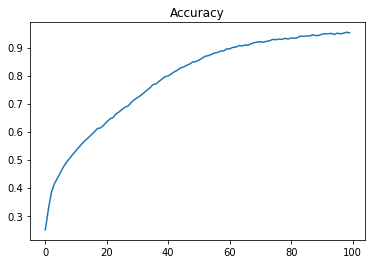

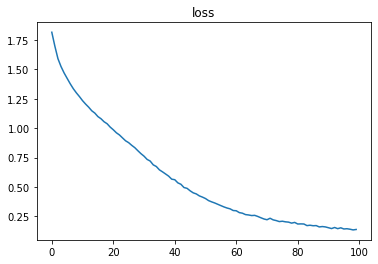

In [ ]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(emotion_model_info.history['accuracy'])
plt.show()
plt.title('loss')
plt.plot(emotion_model_info.history['loss'])
plt.show()

In [ ]:
emotion_model.save('model.h5')

In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

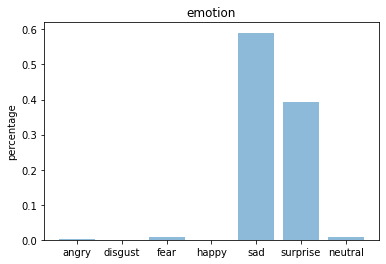

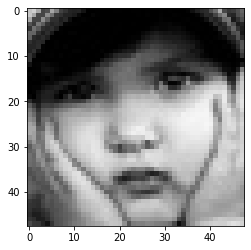

In [ ]:
import cv2

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/test/fear/PrivateTest_1540303.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x =x/ 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import seaborn as sn

In [ ]:
def performance_metrics(model, test):
    y_pred = model.predict(test)
    y_result = []
    for p in y_pred:
        y_result.append(np.argmax(p))
    
    y_actual = []
    for i in range(len(test)):
        for p in test[i][1]:
            y_actual.append(np.argmax(p))
    
    print(classification_report(y_actual, y_result))
    
    cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

    plt.figure(figsize = (10, 7))
    sn.heatmap(cm, annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       958
           1       0.01      0.01      0.01       111
           2       0.14      0.12      0.13      1024
           3       0.25      0.27      0.26      1774
           4       0.16      0.16      0.16      1233
           5       0.17      0.17      0.17      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



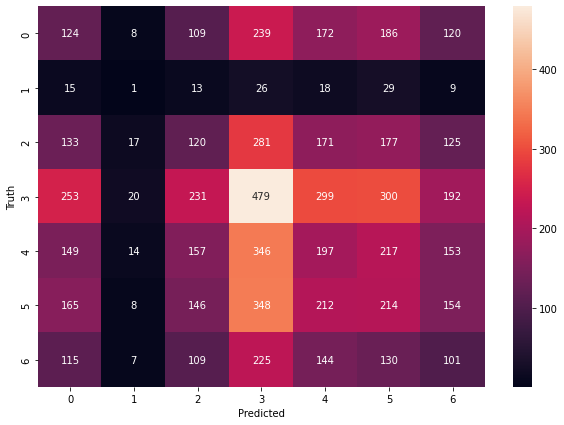

In [ ]:
performance_metrics(emotion_model, test_dataset)

The Model is able to perform quite well. We can notice that the train and validation losses are decreasing constantly and the train as well as validation accuracy increases constantly. There is no over-fitting in the deep learning model and we are able to achieve an accuracy of about about 60% and validation accuracy of about 60%